<a href="https://colab.research.google.com/github/theBuluku/Nairobi_Hospital_-Hypothyroidism_Detection_Project/blob/master/Nairobi_Hospital_Hypothyroidism__Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement.

To determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

# Metrics of Sucess.


i)f1 score.
ii)Accuracy score.
iii)Recall score.
-

#Importing Environments to use in the Project.

In [0]:
#Import libraries
import numpy as np
import pandas as pd
import pydotplus
#Importing decision tree modules.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
#Import scikit-learn module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE 

#Dataset Loading.

In [153]:
#Loading our dataset to use for modelling and displaying the first five rows of the data.
nairobi_hosp_data=pd.read_csv('hypothyroid.csv')
nairobi_hosp_data.head(6)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?


#Exploratory Data Analysis.

This section is for the purpose of getting insights from our dataset and exploring more from our data.

In [154]:
#checking the statistical information of the data
nairobi_hosp_data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [155]:
#checking the number of rows and columns
nairobi_hosp_data.shape

(3163, 26)

In [156]:
#checking the general information about the dataset
nairobi_hosp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [158]:
#Checking for the data types in the dataset.
nairobi_hosp_data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [159]:
#Replacing "?" entries with null values
nairobi_hosp_data=nairobi_hosp_data.replace('?',np.nan)
nairobi_hosp_data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [160]:
#Retrieving unique values for categorical columns.
columns = nairobi_hosp_data.columns
for i in columns:
  print(i)
  print(nairobi_hosp_data[i].unique())
  print("******************")
  print("\n")

status
['hypothyroid' 'negative']
******************


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
******************


sex
['M' 'F' nan]
******************


on_thyroxine
['f' 't']
******************


query_on_thyroxine
['f' 't']
******************


on_antithyroid_medication
['f' 't']
******************


thyroid_surgery
['f' 't']
******************


query_hypothyroid
['f' 't']
******************


query_hyperthyroid
['f' 't']
******************


pregnant
['f' 't']
******************


sick
['f' 't']
******************


tumor
['f' 't']
******************


lithiu

In [161]:
# changing the the data types of the dataset
category =['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured','FTI_measured','TBG_measured']
for i in nairobi_hosp_data.columns:
  if i in category:
    nairobi_hosp_data[i] =nairobi_hosp_data[i].astype('category')
  else:
    nairobi_hosp_data[i] = pd.to_numeric(nairobi_hosp_data[i])
nairobi_hosp_data.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [162]:
# Dealing with missing values
# For age and sex, i will fill with most common age and sex respectively which use of mode
nairobi_hosp_data['age'] = nairobi_hosp_data['age'].fillna(nairobi_hosp_data['age'].mode()[0])

nairobi_hosp_data['sex'] = nairobi_hosp_data['sex'].fillna(nairobi_hosp_data['sex'].mode()[0])
nairobi_hosp_data.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
# Filling the null valued that were not measured with 0
unit_df = ['TSH','T3','TT4','T4U','FTI','TBG']

for i in unit_df:
  nairobi_hosp_data[i].fillna(value = 0, inplace=True)

In [164]:
# Due to the excistence of ?  we shall replace it with null values
nairobi_hosp_data = nairobi_hosp_data.replace("?",np.nan)
nairobi_hosp_data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [165]:
# checking where the null values lie based on whether they were measured or not

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit_data= ['TSH','T3','TT4','T4U','FTI','TBG']

for i,j in zip(measured,unit): 
  print(nairobi_hosp_data.groupby(i)[j].mean())

TSH_measured
n    0.00000
y    5.92318
Name: TSH, dtype: float64
T3_measured
n    0.000000
y    1.939749
Name: T3, dtype: float64
TT4_measured
n      0.00
y    108.85
Name: TT4, dtype: float64
T4U_measured
n    0.000000
y    0.978199
Name: T4U, dtype: float64
FTI_measured
n      0.000000
y    115.397771
Name: FTI, dtype: float64
TBG_measured
n     0.000000
y    31.283077
Name: TBG, dtype: float64


Null values are found when there is no specific measurement at a particular test hence we fill the null values with zero

In [0]:
#Filling the null valued that were not measured with 0
 units_data = ['TSH','T3','TT4','T4U','FTI','TBG']

for i in units_dataframe:
  nairobi_hosp_data[i].fillna(value = 0, inplace=True)

In [167]:
# Checking for duplicates
nairobi_hosp_data.duplicated().any()

True

In [168]:
# Dropping the duplicates

nairobi_hosp_data.drop_duplicates(inplace=True)


# Checking that the duplicates have actualy been dropped

nairobi_hosp_data.duplicated().any()

False

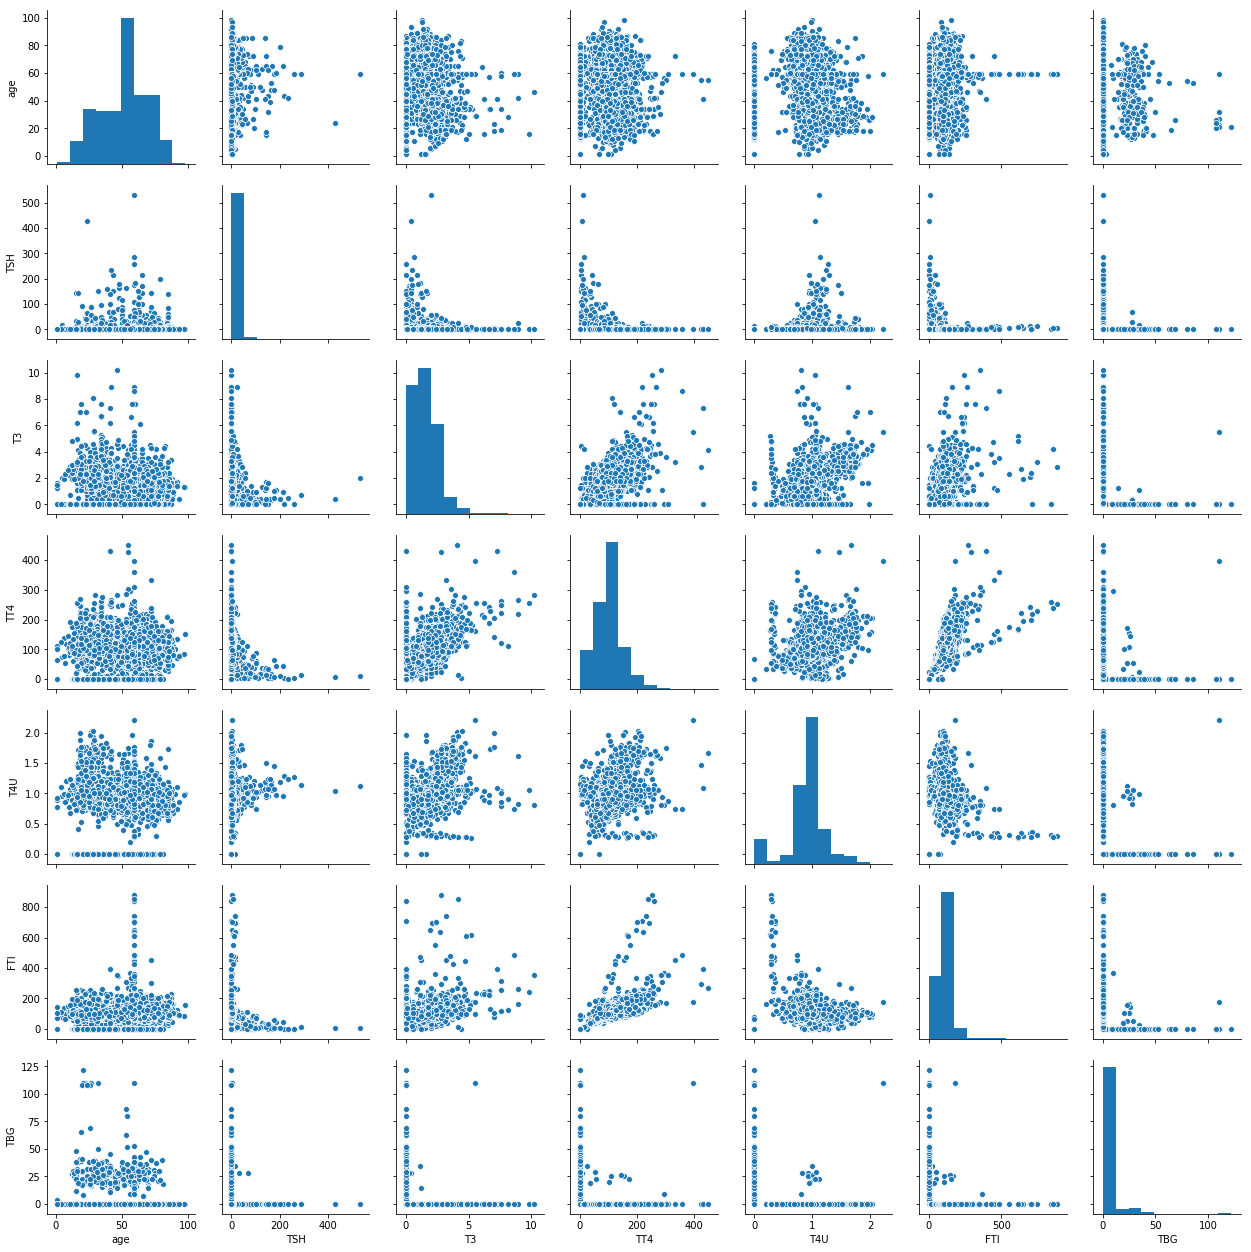

In [0]:
# Checking the relationship among all the variables

sns.pairplot(nairobi_hosp_data)

In [0]:
#Importing matplotlib library for plotting purposes. 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Checking the relationship between T4U and TBG
sns.lmplot(x='T4U',y='TBG',hue='status',data=nairobi_hosp_data,palette=dict(hypothyroid='yellow',negative='red'),fit_reg=False)
plt.title("Scatter of T4U against TBG",color="blue",fontsize=15)
plt.xlabel("Scatter of T4U" ,fontsize=15)
plt.ylabel("Scatter of TBG" ,fontsize=15)
plt.show()

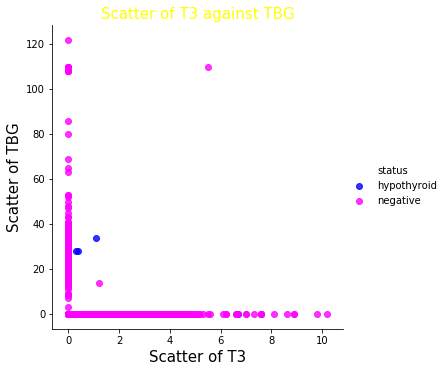

In [0]:
# Checking the relationship between TBG and T3
sns.lmplot(x='T3' ,y='TBG',hue='status',data=nairobi_hosp_data,palette=dict(hypothyroid='blue',negative='magenta'),fit_reg=False)
plt.title("Scatter of T3 against TBG",color="yellow",fontsize=15)
plt.xlabel("Scatter of T3" ,fontsize=15)
plt.ylabel("Scatter of TBG" ,fontsize=15)
plt.show()

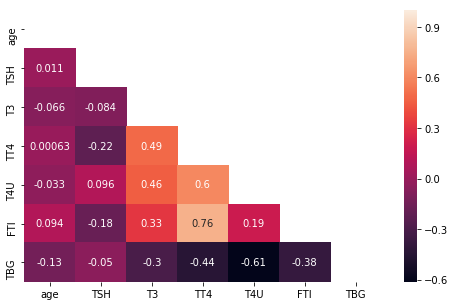

In [0]:
# Getting the relationship between variables in numeric values using a heatmap
#
# Correlation heatmap of the numerical variables 
corr  =nairobi_hosp_data.corr()

plt.figure(figsize = (8,5))
heatmap = np.zeros_like(nairobi_hosp_data.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(nairobi_hosp_data.corr(), annot=True, mask=heatmap)
plt.show()

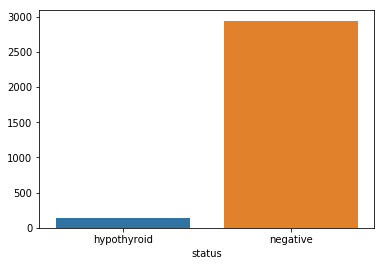

In [0]:
# Visualizing the target variable
target  = nairobi_hosp_data.groupby('status')['status'].count()
sns.barplot(target.index,target.values)
plt.show()

The dataset is highly imbalanced.

#STANDARDIZING AND MODELLING.

In [0]:
from sklearn.preprocessing import StandardScaler,robust_scale,minmax_scale

In [0]:
# Splitting the dataset into target and feature set
# Making categorical data into dummies

x = nairobi_hosp_data.drop('status',axis=1)
X = pd.get_dummies(x)

y = nairobi_hosp_data['status']
y =pd.get_dummies(y,drop_first=True)

In [0]:
#To split the dataset for training and testing/

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [0]:
# Implementing Standard Scaler to nomalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#SUPPORT VECTOR MACHINE MODELLING.

In [0]:
#Importing support vector machine environments.
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,r2_score,precision_score,recall_score,f1_score
import warnings

In [0]:
# implementing support vector machines with a linear kernel
svcl = SVC(kernel='linear')
svcl.fit(x_train,y_train)
y_pred = svcl.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

In [0]:
# implementing support vector machines with a polynomial kernel
svcp = SVC(kernel='poly')
svcp.fit(x_train,y_train)
y_pred = svcp.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

In [0]:
#Employing support vector machines with a sigmoid kernel
svcs = SVC(kernel='sigmoid')
svcs.fit(x_train,y_train)
y_pred = svcs.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

In [0]:
#Employing support vector machines with a sigmoid kernel
svcs = SVC(kernel='sigmoid')
svcs.fit(x_train,y_train)
y_pred = svcs.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9078838174273859
precision_score 0.9132653061224489
recall_score 0.8994974874371859
f1_score 0.9063291139240507


In [178]:
# Now we are implementing Gradient Boosting
grad_f = GradientBoostingClassifier()
grad_f.fit(x_train,y_train)
y_pred = grad_f.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.993517017828201
precision_score 0.9966216216216216
recall_score 0.9966216216216216
f1_score 0.9966216216216216


All the scores are about 99% meaning it is a good model

In [0]:
# # Having in mind that rbf kernel is the best parameter lets look at how to optimize other parameters like c and gamma
param ={
        "C":np.arange(1,100,1),
        "gamma" : np.arange(2**-5,2**5,0.01)
 }
kfold = KFold(n_splits=10,random_state=0)
 rsc = RandomizedSearchCV(svcr,param_distributions=param,cv=kfold,verbose=0,random_state=0)
  rsc.fit(x_train,y_train)
  print(rsc.best_params_)
   print(rsc.best_score_)
  {'gamma': 4.251250000000001, 'C': 96}
   0.9388535031847134

#DECISION TREE IMPLEMENTATION.
#Random Forest.

In [0]:
# Splitting the dataset into target and feature set
# Making categorical data into dummies

x = nairobi_hosp_data.drop('status',axis=1)
X = pd.get_dummies(x)

y = nairobi_hosp_data['status']
y =pd.get_dummies(y,drop_first=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,gradient_boosting

In [190]:
#Creating a random classifiers
ran_f = RandomForestClassifier()
ran_f.fit(x_train,y_train)
y_pred = ran_f.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9886547811993517
precision_score 0.9915966386554622
recall_score 0.9966216216216216
f1_score 0.9941027801179445


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#Parameter Tuning.

In [0]:
#Importing model selection.
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold

In [0]:
#Tuning to get the best parameters of randomforest
param ={
    "criterion":['gini','entropy'],
    "min_samples_split" : np.arange(1,100,1),
    "n_estimators":np.arange(1,100,1),
    "max_depth":np.arange(1,10,1),
    "n_jobs":np.arange(1,100,1)
}
kfold = KFold(n_splits=10,random_state=0)
rsc = RandomizedSearchCV(ran_f,param,cv=kfold,verbose=0,random_state=0)
rsc.fit(x_train,y_train)
print(rsc.best_params_)
print(rsc.best_score_)

# Feature Importance Determination.

In [193]:
# Get numerical feature importances
importances = list(ran_f.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: thyroid_surgery      Importance: 0.3
Variable: sex                  Importance: 0.24
Variable: query_on_thyroxine   Importance: 0.18
Variable: age                  Importance: 0.04
Variable: on_thyroxine         Importance: 0.04
Variable: on_antithyroid_medication Importance: 0.04
Variable: query_hyperthyroid   Importance: 0.01
Variable: TSH_measured         Importance: 0.01
Variable: TT4_measured         Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: query_hypothyroid    Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH                  Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: T3                   Importance: 0.0
Variable: T4U_measured         Importance: 0.0
Variable: T4U                  Importance: 0.0

In [196]:
from collections import OrderedDict
#To get the variables with the highest importance

ran_clf = RandomForestClassifier(max_depth= 8,n_jobs= 83, min_samples_split= 87, criterion= 'gini',n_estimators= 49)
ran_clf.fit(x_train,y_train)
importance = ran_clf.feature_importances_
names = X.columns
dict1 = {}
for i,j in zip(names,importance):
  dict1[i] = j
OrderedDict(sorted(dict1.items(),key =lambda x:x[1],reverse=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


OrderedDict([('FTI', 0.30721000122698433),
             ('TT4', 0.26302161523046214),
             ('TSH', 0.21674169198164858),
             ('T4U', 0.05842442933197151),
             ('T3', 0.03342233519724624),
             ('TBG_measured_y', 0.03043721835178707),
             ('TSH_measured_y', 0.02337052920243058),
             ('TT4_measured_y', 0.012596095562421649),
             ('T3_measured_n', 0.012346624358896429),
             ('T4U_measured_y', 0.00919538496826893),
             ('FTI_measured_n', 0.0061314061639586625),
             ('TSH_measured_n', 0.005005944823273004),
             ('age', 0.004345717349914229),
             ('TBG', 0.0029526303707405337),
             ('T3_measured_y', 0.0021181537565391484),
             ('thyroid_surgery_t', 0.0018095113714253729),
             ('query_hypothyroid_f', 0.001793687239064581),
             ('thyroid_surgery_f', 0.0017008148391261999),
             ('TBG_measured_n', 0.0013058721279627578),
             ('on_antithyr

The most important feature is FTI and the least important feature is lithium_t

In [0]:
#we visualize using 50 trees
dot_data = StringIO()
# pick a specific tree from the forest
tree = clf.estimators_[30]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hyperthyroid.png')
Image(graph.create_png())

#Boosting.

In [182]:
#Boosting using Adaboosting with randomForest

ran_f = AdaBoostClassifier(RandomForestClassifier(max_depth= 8,n_jobs= 83, min_samples_split= 87, criterion= 'gini'),n_estimators= 93)
ran_f.fit(x_train,y_train)
y_pred = ran_f.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/fo

accuracy_score 0.9967585089141004
precision_score 0.9966329966329966
recall_score 1.0
f1_score 0.9983136593591906


In [183]:
#Gradient Boosting
grad_f = GradientBoostingClassifier()
grad_f.fit(x_train,y_train)
y_pred = grad_f.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score 0.993517017828201
precision_score 0.9966216216216216
recall_score 0.9966216216216216
f1_score 0.9966216216216216


#Random Forest Implementation.

In [0]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 20 rows
features = pd.read_csv('hypothyroid.csv')
features.head(20)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [0]:
print('The shape of our features is:', features.shape)

The shape of our features is: (3163, 26)


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [0]:
# implementing random forest
ran_f = RandomForestClassifier()
ran_f.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2372, 25)
Training Labels Shape: (2372,)
Testing Features Shape: (791, 25)
Testing Labels Shape: (791,)


In [0]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Baseline error: ', round(np.mean(baseline_errors), 2))

In [0]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
#  
y = nairobi_hosp_data['status'].values


test_features = nairobi_hosp_data.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = nairobi_hosp_data[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


In [0]:
from sklearn.svm import SVC

In [0]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = svcr2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hyperthyroid Classification with RBF SVC')
X = nairobi_hosp_data[['age', 'TSH']].iloc[:150, :].values
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svcr2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=type_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('TSH')
ax.set_xlabel('Age')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [146]:
# implementing random forest
ran_f = RandomForestClassifier()
ran_f.fit(x_train,y_train)
y_pred = ran_f.predict(x_test)
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("f1_score",f1_score(y_test,y_pred))

accuracy_score 0.9902755267423015
precision_score 0.9932659932659933
recall_score 0.9966216216216216
f1_score 0.9949409780775715


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [148]:
# Tuning to get the best parameters of randomforest
param ={
    "criterion":['gini','entropy'],
    "min_samples_split" : np.arange(1,100,1),
    "n_estimators":np.arange(1,100,1),
    "max_depth":np.arange(1,10,1),
    "n_jobs":np.arange(1,100,1)
}
kfold = KFold(n_splits=10,random_state=0)
rsc = RandomizedSearchCV(ran_f,param,cv=kfold,verbose=0,random_state=0)
rsc.fit(x_train,y_train)
print(rsc.best_params_)
print(rsc.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

{'n_jobs': 65, 'n_estimators': 52, 'min_samples_split': 50, 'max_depth': 7, 'criterion': 'entropy'}
0.9854132901134521


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
